In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [4]:
df.columns = ['Demand']
malli = ExponentialSmoothing(df['Demand'], seasonal_periods=4,
                            trend='add', seasonal='mul').fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


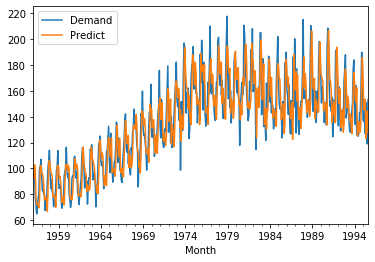

In [5]:
df['Predict'] = malli.fittedvalues
df.plot()

In [6]:
sqrt(mean_squared_error(df['Demand'], df['Predict']))

17.143616433336895

In [7]:
mean_absolute_error(df['Demand'], df['Predict'])

13.2961783933691

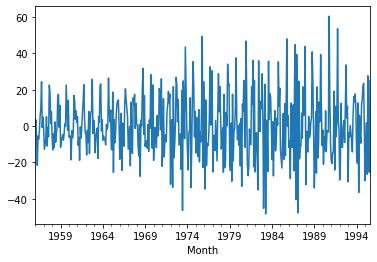

In [9]:
df['Resid'] = malli.resid

df['Resid'].plot()

In [10]:
df.tail()

,Demand,Predict,Resid
Month,,,
1995-04-01,127.0,153.461069,-26.461069
1995-05-01,151.0,123.364426,27.635574
1995-06-01,130.0,142.354254,-12.354254
1995-07-01,119.0,144.474543,-25.474543
1995-08-01,153.0,127.818561,25.181439


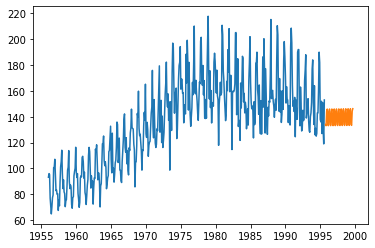

In [14]:
index = pd.date_range('1995-09-01', periods=48, freq='M')

plt.plot(df.index, df['Demand'])
plt.plot(index, malli.forecast(48))

In [15]:
malli.params

{'smoothing_level': 0.7190142633474711,
 'smoothing_slope': 3.512861782301024e-18,
 'smoothing_seasonal': 1.052837892618966e-17,
 'damping_slope': nan,
 'initial_level': 131.74869661574013,
 'initial_slope': 0.008542151594078732,
 'initial_seasons': array([0.70567248, 0.7013048 , 0.75908522, 0.76903729]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [16]:
df

,Demand,Predict,Resid
Month,,,
1956-01-01,93.2,92.977457,0.222543
1956-02-01,96.0,92.566996,3.433004
1956-03-01,95.2,102.871812,-7.671812
1956-04-01,77.1,98.638632,-21.538632
1956-05-01,70.9,76.306764,-5.406764
1956-06-01,64.8,71.976984,-7.176984
1956-07-01,70.1,72.328128,-2.228128
1956-08-01,77.3,71.659904,5.640096
1956-09-01,79.5,69.482687,10.017313


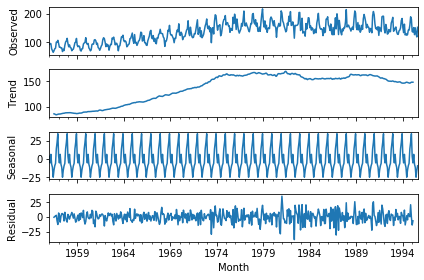

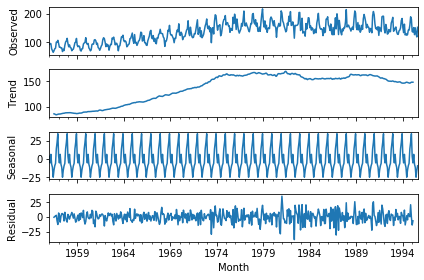

In [17]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Demand']).plot()